In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools as it
import math
import networkx as nx

## Read in data

In [2]:
raw_data = pd.read_csv('C:/Users/majikthise/OneDrive/Shared Games Spreadsheet/Gams/2020_gams_raw_data.csv',
                       encoding='cp1252')

bgg_attributes = pd.read_csv('C:/Users/majikthise/OneDrive/Shared Games Spreadsheet/Gams/2020_gams_bgg_attributes.csv',
                       encoding='cp1252')

In [3]:
player_colnames = []
winner_colnames = []
points_colnames = []
for i in range(1,9):
    player_colnames.append(f"P{i}_Name")
    winner_colnames.append(f"P{i}_Win")
    points_colnames.append(f"P{i}_Pts")

print(player_colnames)
print(winner_colnames)
print(points_colnames)

['P1_Name', 'P2_Name', 'P3_Name', 'P4_Name', 'P5_Name', 'P6_Name', 'P7_Name', 'P8_Name']
['P1_Win', 'P2_Win', 'P3_Win', 'P4_Win', 'P5_Win', 'P6_Win', 'P7_Win', 'P8_Win']
['P1_Pts', 'P2_Pts', 'P3_Pts', 'P4_Pts', 'P5_Pts', 'P6_Pts', 'P7_Pts', 'P8_Pts']


In [4]:
raw_data['Num_Participants'] = raw_data[player_colnames].count(axis=1)
raw_data['Num_Winners'] = raw_data[winner_colnames].sum(axis=1)
raw_data['Tot_Pts'] = raw_data[points_colnames].sum(axis=1)

In [5]:
raw_data.describe()

,P1_Pts,P2_Pts,P3_Pts,P4_Pts,P5_Pts,P6_Pts,P7_Pts,P8_Pts,P1_Win,P2_Win,P3_Win,P4_Win,P5_Win,P6_Win,P7_Win,P8_Win,Num_Participants,Num_Winners,Tot_Pts
count,216.000000,216.000000,117.000000,88.000000,29.000000,8.000000,0.0,0.0,346.000000,346.000000,160.000000,128.000000,54.000000,12.000000,4.00,1.0,346.000000,346.000000,346.000000
mean,210.314815,257.324074,289.581197,313.738636,1228.137931,81.625000,NaN,NaN,0.416185,0.413295,0.281250,0.195312,0.240741,0.083333,0.25,0.0,3.037572,1.075145,574.476879
std,2098.572164,2799.145786,2519.038720,2446.600313,6264.889571,137.207806,NaN,NaN,0.492169,0.491666,0.451021,0.397999,0.431548,0.288675,0.50,NaN,1.288198,0.349103,8392.597117
min,-15.000000,-2.000000,-5.000000,-4.000000,0.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,2.000000,0.000000,0.000000
25%,33.000000,34.000000,32.000000,30.750000,28.000000,14.250000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,2.000000,1.000000,0.000000
50%,57.500000,56.000000,44.000000,41.000000,49.000000,38.500000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,2.000000,1.000000,93.500000
75%,94.000000,97.250000,78.000000,75.250000,75.000000,57.750000,NaN,NaN,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.25,0.0,4.000000,1.000000,188.000000
max,30900.000000,41200.000000,27300.000000,23000.000000,33800.000000,414.000000,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00,0.0,8.000000,4.000000,156200.000000


In [6]:
raw_data.columns

Index(['Game', 'Is_Max_2_Player', 'Length', 'Date', 'P1_Name', 'P2_Name',
       'P3_Name', 'P4_Name', 'P5_Name', 'P6_Name', 'P7_Name', 'P8_Name',
       'P1_Pts', 'P2_Pts', 'P3_Pts', 'P4_Pts', 'P5_Pts', 'P6_Pts', 'P7_Pts',
       'P8_Pts', 'P1_Win', 'P2_Win', 'P3_Win', 'P4_Win', 'P5_Win', 'P6_Win',
       'P7_Win', 'P8_Win', 'Num_Participants', 'Num_Winners', 'Tot_Pts'],
      dtype='object')

In [7]:
raw_data.head()

,Game,Is_Max_2_Player,Length,Date,P1_Name,P2_Name,P3_Name,P4_Name,P5_Name,P6_Name,...,P2_Win,P3_Win,P4_Win,P5_Win,P6_Win,P7_Win,P8_Win,Num_Participants,Num_Winners,Tot_Pts
0,Fog of Love,Yes,Long,01/01/2020,Sam,Aislinn,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2,0.0,0.0
1,Patchwork,Yes,Short,01/01/2020,Sam,Aislinn,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2,1.0,0.0
2,Patchwork,Yes,Short,01/01/2020,Sam,Aislinn,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2,1.0,0.0
3,Taverns of Tiefenthal,No,Long,03/01/2020,Sam,Aislinn,Dan Foster,Jaime,NaN,NaN,...,1.0,0.0,0.0,NaN,NaN,NaN,NaN,4,1.0,0.0
4,Camel Up,No,Medium,04/01/2020,Sam,Aislinn,Anya Rhodes,Emma Rhodes,Daniel Rhodes,Chris Keogh,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,1.0,0.0


## Playcount by Game

In [8]:
game_counts = raw_data.groupby('Game').size().sort_values()

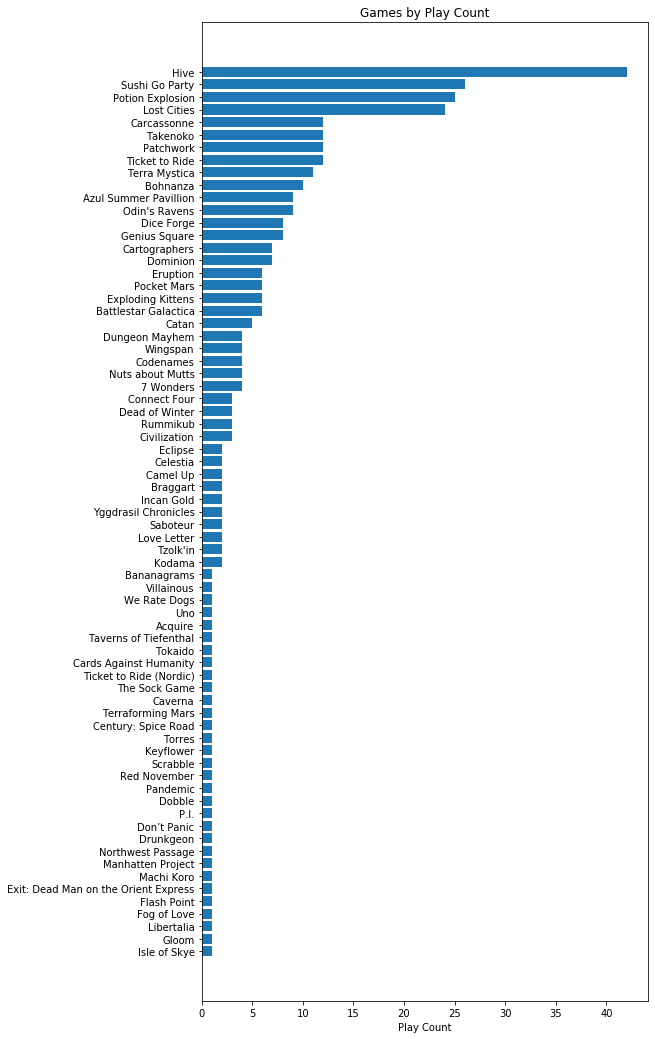

In [9]:
#game_counts.plot(kind='barh', figsize = (10,14), title = 'Games by Play Count')


fig, ax = plt.subplots(figsize = (8,18))

y_pos = np.arange(len(game_counts))

ax.barh(y_pos, game_counts, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(game_counts.index)
#ax.invert_yaxis()
ax.set_xlabel('Play Count')
ax.set_title('Games by Play Count')


plt.show()

## Plot players as a graph network

In [10]:



edges = []

for index, row in raw_data.iterrows():
    name_set = {name for name in row[player_colnames] if not pd.isnull(name)}
    
    edges = edges + [{x, y} for x, y in it.combinations(name_set, 2)]

edges = pd.DataFrame(edges)
edges.columns = ['Player 1', 'Player 2']
edges = edges.groupby(['Player 1', 'Player 2']).size().reset_index()
edges.columns = ['Player 1', 'Player 2', 'Number of Games']
#edges['Width'] = np.sqrt(edges['Number of Games'])/3
edges['Width'] = edges['Number of Games'] / 25
edges.head()

,Player 1,Player 2,Number of Games,Width
0,Adam Harwood,Aislinn,16,0.64
1,Adam Harwood,Dan Foster,2,0.08
2,Adam Harwood,JP,1,0.04
3,Adam Holmes,Adam Harwood,1,0.04
4,Adam Holmes,Ben Slater,4,0.16


In [11]:
vertices = pd.DataFrame(raw_data[player_colnames].apply(pd.value_counts).sum(axis=1)).reset_index()
vertices.columns = ['Player', 'Number of Games']
vertices = vertices.astype({'Number of Games': 'int32'})
vertices.head()

,Player,Number of Games
0,Adam Harwood,19
1,Adam Holmes,5
2,Aislinn,328
3,Anya Rhodes,11
4,Ben Davies,8


In [12]:
G = nx.from_pandas_edgelist(edges, 'Player 1', 'Player 2', edge_attr='Width')


#colors = nx.get_edge_attributes(G,'Colors').values()
weights = nx.get_edge_attributes(G,'Width').values()

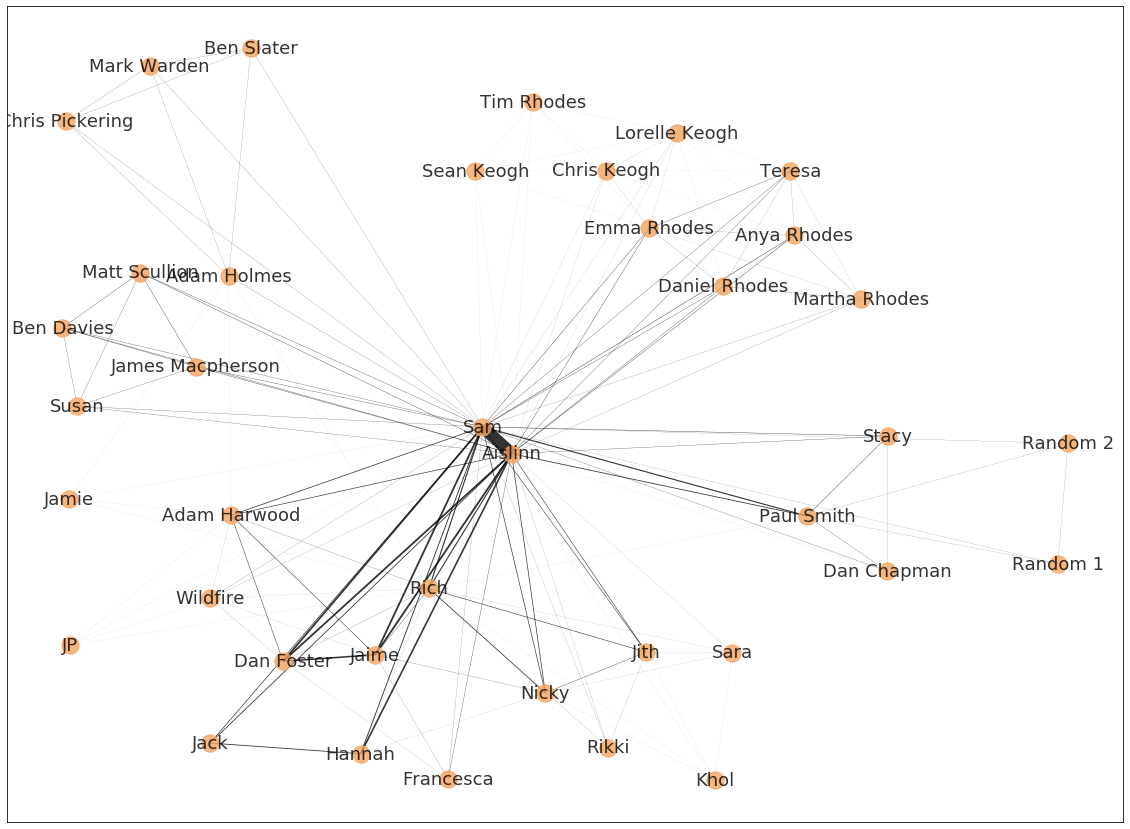

In [13]:
plt.figure(figsize=(20, 15))


pos = nx.spring_layout(G, weight='Number of Games', seed=18)
nx.draw_networkx(G, pos,
                 #edge_color=colors, 
                width=list(weights),
                with_labels=True,
                 font_size = 18,
                 alpha = 0.8,
                node_color='sandybrown')

## Adjusted win-rate by player

In [14]:
# Function to filter games involving specified player - extract the correct pts/win column value for each game
def get_games_by_player(player, dat = raw_data):
    games_by_player = []
    for index, row in dat.iterrows():
        if player in row[player_colnames].values:
            i = int(np.where(row[player_colnames].values == player)[0]) + 1
            relevant_cols = ['Game','Is_Max_2_Player','Length','Date',f"""P{i}_Name""",f"""P{i}_Pts""", f"""P{i}_Win""",
                            'Num_Participants','Num_Winners','Tot_Pts']
            games_by_player.append(row[relevant_cols].values)

    games_by_player = pd.DataFrame(games_by_player)
    games_by_player.columns = ['Game','Is_Max_2_Player','Length','Date','Individual_Name','Individual_Pts','Individual_Win',
                               'Num_Participants','Num_Winners','Tot_Pts']
    return(games_by_player)

In [15]:
def get_player_adjusted_win_rate(player):
    gams = get_games_by_player(player)
    
    win_rate = gams['Individual_Win'].mean()
    expected_win_rate = gams['Num_Winners'].sum() / gams['Num_Participants'].sum()
    
    gams_with_pts = gams[gams['Tot_Pts'] > 0].copy()
    
    if gams_with_pts.shape[0] > 0:
        
        gams_with_pts['Individual_Pts_Scaled'] = gams_with_pts['Individual_Pts'] /\
                                                 (gams_with_pts['Tot_Pts'] / gams_with_pts['Num_Participants'])
        act_vs_pred_pts = gams_with_pts['Individual_Pts_Scaled'].mean()
    else:
        act_vs_pred_pts = 1
    
    act_vs_pred = win_rate/expected_win_rate
    n = gams['Individual_Win'].size
    
    print(f"""{player} win rate = {round(win_rate,3)}
           expected_win_rate = {round(expected_win_rate,3)}
           Actual vs predicted win rate = {round(act_vs_pred,3)}
           Actual vs predicted pts = {round(act_vs_pred_pts,3)}""")
    print('\n')
    return((player, win_rate, expected_win_rate, act_vs_pred, act_vs_pred_pts, n))

In [16]:
unique_players = [x for x in pd.unique(raw_data[player_colnames].values.ravel()) if x == x]
print(unique_players)

['Sam', 'Aislinn', 'Dan Foster', 'Jaime', 'Anya Rhodes', 'Emma Rhodes', 'Daniel Rhodes', 'Chris Keogh', 'Lorelle Keogh', 'Teresa', 'Martha Rhodes', 'Tim Rhodes', 'Sean Keogh', 'Francesca', 'Rich', 'Nicky', 'Hannah', 'Jith', 'Adam Harwood', 'Jack', 'Paul Smith', 'Dan Chapman', 'Stacy', 'Rikki', 'Wildfire', 'Khol', 'Sara', 'Random 1', 'Random 2', 'Matt Scullion', 'Susan', 'James Macpherson', 'Ben Davies', 'Chris Pickering', 'Adam Holmes', 'Ben Slater', 'Mark Warden', 'JP', 'Jamie']


In [17]:
gams = get_games_by_player('Chris Pickering')
gams.head(20)

,Game,Is_Max_2_Player,Length,Date,Individual_Name,Individual_Pts,Individual_Win,Num_Participants,Num_Winners,Tot_Pts
0,Battlestar Galactica,No,Long,31/05/2020,Chris Pickering,NaN,0.0,5,3.0,0.0
1,Battlestar Galactica,No,Long,14/06/2020,Chris Pickering,NaN,1.0,5,2.0,0.0
2,Battlestar Galactica,No,Long,05/09/2020,Chris Pickering,NaN,0.0,5,2.0,0.0
3,Battlestar Galactica,No,Long,22/11/2020,Chris Pickering,NaN,0.0,5,2.0,0.0


In [18]:
player_stats = pd.DataFrame([get_player_adjusted_win_rate(player) for player in unique_players])

Sam win rate = 0.387
           expected_win_rate = 0.351
           Actual vs predicted win rate = 1.102
           Actual vs predicted pts = 0.984


Aislinn win rate = 0.454
           expected_win_rate = 0.356
           Actual vs predicted win rate = 1.278
           Actual vs predicted pts = 1.068


Dan Foster win rate = 0.239
           expected_win_rate = 0.26
           Actual vs predicted win rate = 0.919
           Actual vs predicted pts = 0.966


Jaime win rate = 0.255
           expected_win_rate = 0.25
           Actual vs predicted win rate = 1.021
           Actual vs predicted pts = 0.917


Anya Rhodes win rate = 0.273
           expected_win_rate = 0.212
           Actual vs predicted win rate = 1.289
           Actual vs predicted pts = 1


Emma Rhodes win rate = 0.444
           expected_win_rate = 0.26
           Actual vs predicted win rate = 1.709
           Actual vs predicted pts = 1


Daniel Rhodes win rate = 0.125
           expected_win_rate = 0.178
        

In [19]:
player_stats.columns = ['Player', 'Win Rate', 'Expected Win Rate', 'Actual vs Expected Win Rate', 'Actual vs Expected Pts',
                        'Number of Games']

In [20]:
player_stats.sort_values(by = 'Number of Games', ascending = False)

,Player,Win Rate,Expected Win Rate,Actual vs Expected Win Rate,Actual vs Expected Pts,Number of Games
1,Aislinn,0.454268,0.355533,1.277711,1.067552,328
0,Sam,0.386997,0.351160,1.102052,0.984189,323
3,Jaime,0.255319,0.250000,1.021277,0.916793,47
2,Dan Foster,0.239130,0.260204,0.919011,0.966336,46
16,Hannah,0.200000,0.333333,0.600000,0.901919,40
14,Rich,0.290323,0.222973,1.302053,0.992672,31
20,Paul Smith,0.428571,0.282828,1.515306,1.046316,28
19,Jack,0.250000,0.272727,0.916667,0.970679,20
18,Adam Harwood,0.315789,0.255556,1.235698,1.049518,19
15,Nicky,0.277778,0.218391,1.271930,1.030572,18


## Scatterplot of Games (Aislinn vs Sam)

In [18]:
# Join on game attributes from BGG
gams_scatter = pd.merge(raw_data, bgg_attributes, on = 'Game', how = 'inner')

In [22]:
# Filter to those games we are both involved in
gams_scatter = gams_scatter[gams_scatter[player_colnames].apply(lambda x: ('Aislinn' in x.values) and ('Sam' in x.values),
                                                                axis=1)]


In [23]:
# Calculate who won each game (out of sam and aislinn)
Did_Aislinn_Win = []

for index, row in gams_scatter.iterrows():
    sam_i = int(np.where(row[player_colnames].values == 'Sam')[0]) + 1
    aislinn_i = int(np.where(row[player_colnames].values == 'Aislinn')[0]) + 1
    
    
    if row[f"""P{sam_i}_Win"""] < row[f"""P{aislinn_i}_Win"""]:
        did_aislinn_win = 1
    elif row[f"""P{sam_i}_Win"""] > row[f"""P{aislinn_i}_Win"""]:
        did_aislinn_win = 0
    elif row[f"""P{sam_i}_Win"""] == row[f"""P{aislinn_i}_Win"""]:
        if row[f"""P{sam_i}_Pts"""] < row[f"""P{aislinn_i}_Pts"""]:
            did_aislinn_win = 1
        elif row[f"""P{sam_i}_Pts"""] > row[f"""P{aislinn_i}_Pts"""]:
            did_aislinn_win = 0
        else:
            did_aislinn_win = 0.5
    else:
        did_aislinn_win = 0.5
    Did_Aislinn_Win.append(did_aislinn_win)
    

gams_scatter['Did_Aislinn_Win'] = Did_Aislinn_Win

In [24]:
# Summarise by game
scatter_plot_data = gams_scatter.groupby('Game').agg({'Did_Aislinn_Win': [np.mean],
                                                      'max_time': [np.mean], 'weight': [np.mean, np.size]}).reset_index()
scatter_plot_data.columns = ['Game','Does Aislinn Win','Playtime','Complexity','Num Plays']

In [25]:
# Filter the games wot we want to see in the chart:

# either by > 1 playcount:
#scatter_plot_data = scatter_plot_data[scatter_plot_data['Num Plays']>1]

# or manually:
scatter_plot_data = scatter_plot_data[~scatter_plot_data['Game'].isin(['Exit: Dead Man on the Orient Express',
'Flash Point', 'Fog of Love', 'Pandemic', 'Red November', 'Cards Against Humanity', 'Yggdrasil Chronicles','Dobble',
'Don’t Panic','P.I.','The Sock Game','Northwest Passage','Drunkgeon'
])]

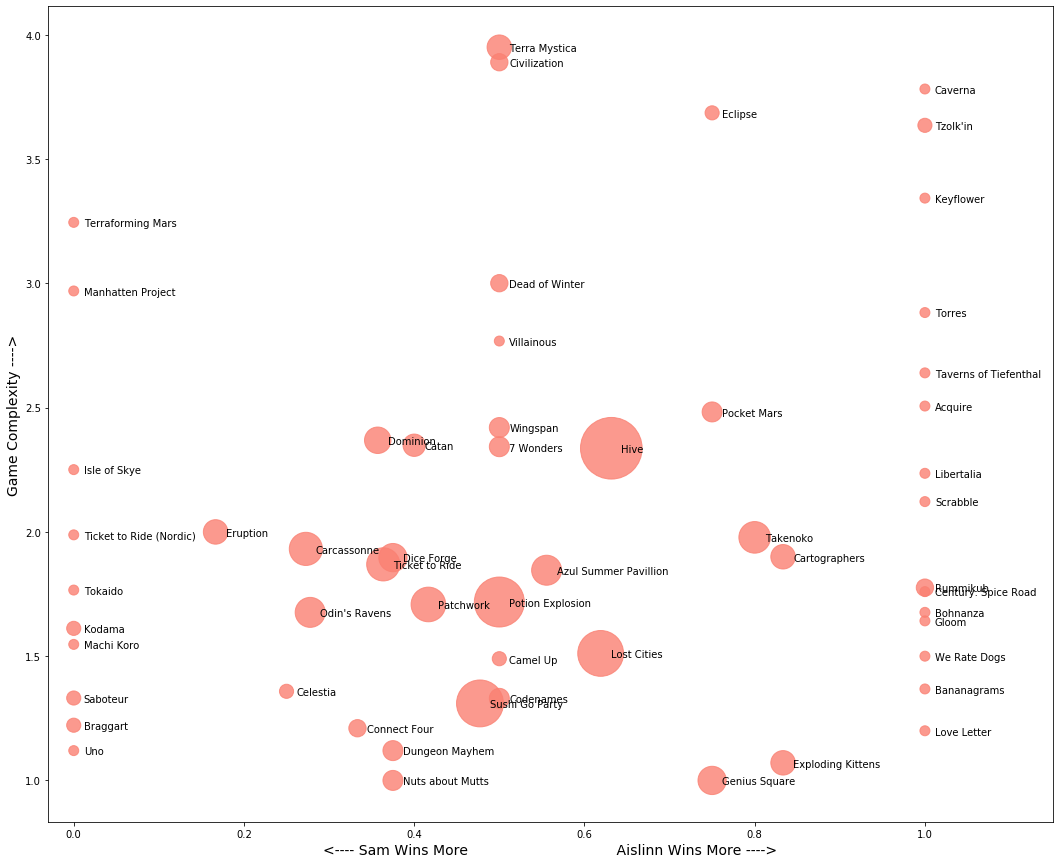

In [47]:
# Draw scatterplot
plt.figure(figsize=(18, 15))
plt.scatter(scatter_plot_data['Does Aislinn Win'], scatter_plot_data['Complexity'], 
                  color='salmon', 
                 alpha=0.8,
                 s = scatter_plot_data['Num Plays'] * 100)
plt.xlim(-0.03, 1.15)
plt.xlabel("<---- Sam Wins More                                 Aislinn Wins More ---->", size=14)
plt.ylabel("Game Complexity ---->", size=14)



# add labels
for x, y, game, plays in scatter_plot_data[['Does Aislinn Win','Complexity','Game','Num Plays']].values:

    plt.annotate(game, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(10,-4), # distance from text to points (x,y)
                 ha='left') # horizontal alignment can be left, right or center

## People's chosen games

Most committed to their favourite game (player for whom their most played game accounts for the biggest proportion of all games they have played)
Jack of all trades (player who has played the most different games or shows no significant preference between the games they have played)
Player who has played the most short, medium and long games (party gamer, in betweener, hardcore gamer)

In [24]:
# Join on game attributes from BGG
gams_scatter = pd.merge(raw_data, bgg_attributes, on = 'Game', how = 'inner')

In [26]:
gams_scatter.head()

,Game,Is_Max_2_Player,Length,Date,P1_Name,P2_Name,P3_Name,P4_Name,P5_Name,P6_Name,...,Tot_Pts,min_players,max_players,min_time,max_time,year,avg_rating,geek_rating,age,weight
0,Fog of Love,Yes,Long,01/01/2020,Sam,Aislinn,NaN,NaN,NaN,NaN,...,0.0,2,2,60,120,2017,7.54994,6.53024,17,2.2000
1,Patchwork,Yes,Short,01/01/2020,Sam,Aislinn,NaN,NaN,NaN,NaN,...,0.0,2,2,15,30,2014,7.76056,7.64154,8,1.7081
2,Patchwork,Yes,Short,01/01/2020,Sam,Aislinn,NaN,NaN,NaN,NaN,...,0.0,2,2,15,30,2014,7.76056,7.64154,8,1.7081
3,Patchwork,Yes,Short,11/01/2020,Sam,Aislinn,NaN,NaN,NaN,NaN,...,0.0,2,2,15,30,2014,7.76056,7.64154,8,1.7081
4,Patchwork,Yes,Short,11/01/2020,Sam,Aislinn,NaN,NaN,NaN,NaN,...,0.0,2,2,15,30,2014,7.76056,7.64154,8,1.7081


In [110]:
def player_chosen_games(player, dat = gams_scatter):
    games_by_player = []
    for index, row in dat.iterrows():
        if player in row[player_colnames].values:
            i = int(np.where(row[player_colnames].values == player)[0]) + 1
            relevant_cols = ['Game','max_time','Date',f"""P{i}_Name""",f"""P{i}_Pts""", f"""P{i}_Win""",
                            'Num_Participants','Num_Winners','Tot_Pts']
            games_by_player.append(row[relevant_cols].values)

    games_by_player = pd.DataFrame(games_by_player)
    games_by_player.columns = ['Game','max_time','Date','Individual_Name','Individual_Pts','Individual_Win',
                               'Num_Participants','Num_Winners','Tot_Pts']
    
    print(f"""Average game length: {round(games_by_player['max_time'].mean(),0)} mins""")
    
    gamecounts = games_by_player.groupby('Game').size().reset_index()
    print(f"""{gamecounts[0].shape[0]} different games out of {gamecounts[0].sum()} played, Ratio of {round(gamecounts[0].shape[0] / gamecounts[0].sum(),4)}""")
    gamecounts[0] /= gamecounts[0].sum()
    most_common_game = list(gamecounts.sort_values(by = 0, ascending = False).iloc[0,:])
    print(f"""Favourite game is {most_common_game[0]}, with {round(100*most_common_game[1],1)}% of all plays""")
    
    
    return(games_by_player)

In [111]:
for player in unique_players:
    print(player)
    player_chosen_games(player)
    print('\n')

Sam
Average game length: 51.0 mins
71 different games out of 323 played, Ratio of 0.2198
Favourite game is Hive, with 12.4% of all plays


Aislinn
Average game length: 45.0 mins
70 different games out of 328 played, Ratio of 0.2134
Favourite game is Hive, with 12.2% of all plays


Dan Foster
Average game length: 51.0 mins
18 different games out of 46 played, Ratio of 0.3913
Favourite game is Ticket to Ride, with 15.2% of all plays


Jaime
Average game length: 46.0 mins
18 different games out of 47 played, Ratio of 0.383
Favourite game is Sushi Go Party, with 14.9% of all plays


Anya Rhodes
Average game length: 18.0 mins
5 different games out of 11 played, Ratio of 0.4545
Favourite game is Exploding Kittens, with 45.5% of all plays


Emma Rhodes
Average game length: 19.0 mins
5 different games out of 9 played, Ratio of 0.5556
Favourite game is Codenames, with 44.4% of all plays


Daniel Rhodes
Average game length: 18.0 mins
4 different games out of 8 played, Ratio of 0.5
Favourite game

## Social Butterfly

In [165]:
# Function to filter games involving specified player - extract the correct pts/win column value for each game
def set_of_played_with(player, dat = gams_scatter):
    played_with = []
    for index, row in dat.iterrows():
        if player in row[player_colnames].values:
            other_players = list(set(row[player_colnames].values))
            played_with += other_players
    played_with = [name for name in played_with if name != player and not pd.isna(name)]
    return(f"""{len(set(played_with))} unique opponents out of {len(played_with)} total, ratio of {round(len(set(played_with))/len(played_with),3)}""")

In [166]:
for player in unique_players:
    print(player)
    print(set_of_played_with(player))
    print('\n')

Sam
38 unique opponents out of 668 total, ratio of 0.057


Aislinn
29 unique opponents out of 648 total, ratio of 0.045


Dan Foster
7 unique opponents out of 150 total, ratio of 0.047


Jaime
8 unique opponents out of 161 total, ratio of 0.05


Anya Rhodes
8 unique opponents out of 41 total, ratio of 0.195


Emma Rhodes
10 unique opponents out of 41 total, ratio of 0.244


Daniel Rhodes
8 unique opponents out of 37 total, ratio of 0.216


Chris Keogh
9 unique opponents out of 13 total, ratio of 0.692


Lorelle Keogh
9 unique opponents out of 13 total, ratio of 0.692


Teresa
8 unique opponents out of 31 total, ratio of 0.258


Martha Rhodes
6 unique opponents out of 20 total, ratio of 0.3


Tim Rhodes
6 unique opponents out of 6 total, ratio of 1.0


Sean Keogh
6 unique opponents out of 6 total, ratio of 1.0


Francesca
4 unique opponents out of 22 total, ratio of 0.182


Rich
16 unique opponents out of 117 total, ratio of 0.137


Nicky
8 unique opponents out of 69 total, ratio of 0.1